In [ ]:
# pip install tensorflow==1.9.0rc2 coremltools==0.8 tensorflowjs==0.5.0
# pip install tf-nightly==1.10.0.dev20180707
# nano /usr/local/anaconda3/envs/tf2/lib/python3.6/site-packages/tensorflow/contrib/lite/python/lite.py

In [ ]:
#pip install coremltools==0.8 Keras==2.1.6 imutils==0.4.6 opencv-python==3.4.1.15


In [ ]:
#https://github.com/ianlokh/MobileNet-On-CoreML.git

In [12]:
import os
import shutil
import hashlib
import urllib.request
import numpy as np

import keras
import tensorflow as tf
import coremltools
import tensorflowjs as tfjs
from tensorflow.python import keras as tf_keras

In [ ]:

#from keras import backend as K
#from keras.models import load_model
#from keras.utils.generic_utils import CustomObjectScope
#from keras.applications.mobilenet import preprocess_input

#from keras.preprocessing import image
#from keras.applications.mobilenet import preprocess_input



In [ ]:
!ls

In [1]:
with open('labels.txt') as f:
    labels = f.read().splitlines()

In [4]:
labels_dict = {idx:label for (idx,label) in enumerate(labels)}

In [9]:
labels_dict

{0: 'affenpinscher',
 1: 'afghan_hound',
 2: 'african_hunting_dog',
 3: 'airedale',
 4: 'american_staffordshire_terrier',
 5: 'appenzeller',
 6: 'australian_terrier',
 7: 'basenji',
 8: 'basset',
 9: 'beagle',
 10: 'bedlington_terrier',
 11: 'bernese_mountain_dog',
 12: 'black-and-tan_coonhound',
 13: 'blenheim_spaniel',
 14: 'bloodhound',
 15: 'bluetick',
 16: 'border_collie',
 17: 'border_terrier',
 18: 'borzoi',
 19: 'boston_bull',
 20: 'bouvier_des_flandres',
 21: 'boxer',
 22: 'brabancon_griffon',
 23: 'briard',
 24: 'brittany_spaniel',
 25: 'bull_mastiff',
 26: 'cairn',
 27: 'cardigan',
 28: 'chesapeake_bay_retriever',
 29: 'chihuahua',
 30: 'chow',
 31: 'clumber',
 32: 'cocker_spaniel',
 33: 'collie',
 34: 'curly-coated_retriever',
 35: 'dandie_dinmont',
 36: 'dhole',
 37: 'dingo',
 38: 'doberman',
 39: 'english_foxhound',
 40: 'english_setter',
 41: 'english_springer',
 42: 'entlebucher',
 43: 'eskimo_dog',
 44: 'flat-coated_retriever',
 45: 'french_bulldog',
 46: 'german_sheph

In [10]:
json.dumps(labels_dict)

'{"0": "affenpinscher", "1": "afghan_hound", "2": "african_hunting_dog", "3": "airedale", "4": "american_staffordshire_terrier", "5": "appenzeller", "6": "australian_terrier", "7": "basenji", "8": "basset", "9": "beagle", "10": "bedlington_terrier", "11": "bernese_mountain_dog", "12": "black-and-tan_coonhound", "13": "blenheim_spaniel", "14": "bloodhound", "15": "bluetick", "16": "border_collie", "17": "border_terrier", "18": "borzoi", "19": "boston_bull", "20": "bouvier_des_flandres", "21": "boxer", "22": "brabancon_griffon", "23": "briard", "24": "brittany_spaniel", "25": "bull_mastiff", "26": "cairn", "27": "cardigan", "28": "chesapeake_bay_retriever", "29": "chihuahua", "30": "chow", "31": "clumber", "32": "cocker_spaniel", "33": "collie", "34": "curly-coated_retriever", "35": "dandie_dinmont", "36": "dhole", "37": "dingo", "38": "doberman", "39": "english_foxhound", "40": "english_setter", "41": "english_springer", "42": "entlebucher", "43": "eskimo_dog", "44": "flat-coated_retrie

In [8]:
import json
with open('label_classes.json', 'w') as fp:
    json.dump(labels_dict, fp, indent=4 )

In [2]:
labels

['affenpinscher',
 'afghan_hound',
 'african_hunting_dog',
 'airedale',
 'american_staffordshire_terrier',
 'appenzeller',
 'australian_terrier',
 'basenji',
 'basset',
 'beagle',
 'bedlington_terrier',
 'bernese_mountain_dog',
 'black-and-tan_coonhound',
 'blenheim_spaniel',
 'bloodhound',
 'bluetick',
 'border_collie',
 'border_terrier',
 'borzoi',
 'boston_bull',
 'bouvier_des_flandres',
 'boxer',
 'brabancon_griffon',
 'briard',
 'brittany_spaniel',
 'bull_mastiff',
 'cairn',
 'cardigan',
 'chesapeake_bay_retriever',
 'chihuahua',
 'chow',
 'clumber',
 'cocker_spaniel',
 'collie',
 'curly-coated_retriever',
 'dandie_dinmont',
 'dhole',
 'dingo',
 'doberman',
 'english_foxhound',
 'english_setter',
 'english_springer',
 'entlebucher',
 'eskimo_dog',
 'flat-coated_retriever',
 'french_bulldog',
 'german_shepherd',
 'german_short-haired_pointer',
 'giant_schnauzer',
 'golden_retriever',
 'gordon_setter',
 'great_dane',
 'great_pyrenees',
 'greater_swiss_mountain_dog',
 'groenendael',


In [10]:
keras.preprocessing

<module 'keras.preprocessing' from '/usr/local/anaconda3/envs/tf2/lib/python3.6/site-packages/keras/preprocessing/__init__.py'>

In [ ]:
tf_keras.preprocessing.image.load_img

In [13]:
def download_image(url,ext=".jpg"):
    url_hash = hashlib.md5(url.encode('utf-8')).hexdigest()
    file_path = f'{DOWNLOAD_FOLDER}/{url_hash}.{ext}'
    
    urllib.request.urlretrieve(url,file_path)

    img = tf_keras.preprocessing.image.load_img(file_path, target_size=(224, 224))
    return img

def predict(im, model, labels,n=5):
    out = model.predict(img_arr[None,:,:,:]).flatten()
    top_indices = out.argsort()[::-1][:n]
    
    top_probability = out[top_indices]
    top_labels = np.array(labels)[top_indices]
    
    res = list(zip(top_labels,top_probability))
    
    return res

def get_top_n_predictions(preds,labels,n=5):
    if len(preds.shape) >1:
        preds = preds.flatten()
    top_idxs = (-preds).argsort()[:n]
    res =[]
    for idx in top_idxs:
        res.append((labels[idx],preds[idx] ))
    return res

In [14]:
DOWNLOAD_FOLDER='downloads'

In [15]:
shutil.rmtree(DOWNLOAD_FOLDER,ignore_errors=True)
os.makedirs(DOWNLOAD_FOLDER, exist_ok=True)

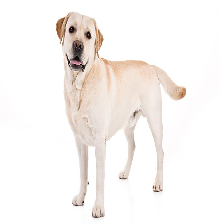

In [16]:
img_url = "https://s3.amazonaws.com/cdn-origin-etr.akc.org/wp-content/uploads/2017/11/12231410/Labrador-Retriever-On-White-01.jpg"
img = download_image(img_url)
img


In [18]:
img_preprocessed = keras.applications.mobilenet.preprocess_input (
        tf_keras.preprocessing.image.img_to_array(img)
)

In [20]:
img_arr = keras.applications.mobilenet.preprocess_input (
        tf_keras.preprocessing.image.img_to_array(img)
)

# Keras

In [21]:
def load_keras_model(model_path):
    with keras.utils.generic_utils.CustomObjectScope({'relu6': keras.applications.mobilenet.relu6,'DepthwiseConv2D': keras.applications.mobilenet.DepthwiseConv2D}):
        keras_model =  keras.models.load_model(model_path)
    return keras_model

In [22]:
keras_model = load_keras_model(model_path='dog_breed.h5')


In [23]:
predict(im=img_preprocessed ,model=keras_model, labels=labels)

[('labrador_retriever', 0.94577754),
 ('walker_hound', 0.022269214),
 ('great_dane', 0.014199846),
 ('english_foxhound', 0.008382441),
 ('whippet', 0.002573074)]

# Tensorflow Estimator

In [24]:
from tensorflow.python import keras as tf_keras

In [25]:
#from tensorflow.python.keras.models import load_model


In [ ]:
keras.applications.mobilenet.relu6

In [32]:
def load_keras_using_tf(model_path):

    custom_objects={'relu6': tf_keras.applications.mobilenet.relu6,'DepthwiseConv2D': tf_keras.applications.mobilenet.DepthwiseConv2D}
    
    model = tf_keras.models.load_model(model_path,custom_objects=custom_objects)
        
    mobilenet_estimator = tf.keras.estimator.model_to_estimator(keras_model=model, custom_objects={'relu6': tf_keras.applications.mobilenet.relu6})
    
    return mobilenet_estimator

In [33]:
tf_keras_model = load_keras_using_tf('dog_breed.h5')

AttributeError: module 'tensorflow.python.keras.applications.mobilenet' has no attribute 'relu6'

In [ ]:
predict_input_fn = tf.estimator.inputs.numpy_input_fn(
  x={"input_1": img_preprocessed[None,:,:,:]},
  num_epochs=1,
  shuffle=False)

In [ ]:
predictions = list(tf_keras_model.predict(input_fn=predict_input_fn))
preds= predictions[0]['dense_1']
get_top_n_predictions(preds=preds,labels=labels)

# convert tfjs

In [ ]:
!pip install tensorflowjs==0.5.0

In [35]:
?tfjs.converters.save_keras_model

In [40]:
tfjs.converters.save_keras_model(
    model = keras_model, 
    artifacts_dir='tfjs_artifacts')

# convert tflite

In [37]:
with tf_keras.utils.generic_utils.CustomObjectScope({'relu6': tf_keras.applications.mobilenet.relu6,'DepthwiseConv2D': tf_keras.applications.mobilenet.DepthwiseConv2D}):
    converter = tf.contrib.lite.TocoConverter.from_keras_model_file("dog_breed.h5")
    
    tflite_model = converter.convert()
    open("dog_breed.tflite", "wb").write(tflite_model)

AttributeError: module 'tensorflow.python.keras.utils' has no attribute 'generic_utils'

# coreml

In [39]:
scale = 1./255
coreml_model = coremltools.converters.keras.convert(keras_model,
                                                    input_names = 'image',
                                                    output_names = 'output',
                                                    image_input_names = 'image',
                                                    image_scale = scale,
                                                    red_bias = -123.68 * scale,
                                                    green_bias = -116.779 * scale,
                                                    blue_bias = -103.939 * scale,
                                                    class_labels=labels)

coreml_model.author = 'Ian Lo'
coreml_model.license = 'MIT'
coreml_model.short_description = 'Model to classify 17 different Singaporean dishes'
coreml_model.input_description['image'] = 'Images from camera in CVPixelBuffer'
coreml_model.output_description['output'] = 'Predicted dishes'

coreml_model.save('dog_breed.mlmodel')

0 : input_1, <keras.engine.topology.InputLayer object at 0x11b1d3278>
1 : conv1_pad, <keras.layers.convolutional.ZeroPadding2D object at 0x11b1d32e8>
2 : conv1, <keras.layers.convolutional.Conv2D object at 0x11b1d3550>
3 : conv1_bn, <keras.layers.normalization.BatchNormalization object at 0x11b1d33c8>
4 : conv1_relu, <keras.layers.core.Activation object at 0x11b1d3358>
5 : conv_pad_1, <keras.layers.convolutional.ZeroPadding2D object at 0x11b1d35c0>
6 : conv_dw_1, <keras.applications.mobilenet.DepthwiseConv2D object at 0x11b1d36d8>
7 : conv_dw_1_bn, <keras.layers.normalization.BatchNormalization object at 0x11b1d3748>
8 : conv_dw_1_relu, <keras.layers.core.Activation object at 0x11b1d37b8>
9 : conv_pw_1, <keras.layers.convolutional.Conv2D object at 0x11b1d3a90>
10 : conv_pw_1_bn, <keras.layers.normalization.BatchNormalization object at 0x11b1d3ac8>
11 : conv_pw_1_relu, <keras.layers.core.Activation object at 0x11b1d3c18>
12 : conv_pad_2, <keras.layers.convolutional.ZeroPadding2D object 

In [ ]:
from tensorflow.python.keras import Sequential
from tensorflow.python.keras import models
from tensorflow.python.keras import layers


In [ ]:
import tensorflow as tf
from tensorflow.python.keras import backend as K
from tensorflow.python.keras.utils import CustomObjectScope
def relu6(x):
    return K.relu(x, max_value=6)
with CustomObjectScope({'relu6': relu6}):
    keras_mobilenet= tf.keras.models.load_model(filepath='dog_breed.h5')

    mobilenet_estimator = tf.keras.estimator.model_to_estimator(keras_model=keras_mobilenet,  custom_objects={'relu6': relu6})

In [ ]:
??preprocess_input

In [ ]:
predict_input_fn = tf.estimator.inputs.numpy_input_fn(
  x={"input_1": preprocess_input(image.img_to_array(img))[None,:,:,:]},
  num_epochs=1,
  shuffle=False)

In [ ]:
predictions = list(mobilenet_estimator.predict(input_fn=predict_input_fn))
#predicted_classes = [p["classes"] for p in predictions]

In [ ]:
preds= predictions[0]['dense_1']
get_top_n_predictions(preds=preds,labels=labels)

In [ ]:
predictions = list(mobilenet_estimator.predict(input_fn=predict_input_fn))
preds= predictions[0]['dense_1']
get_top_n_predictions(preds=preds,labels=labels)

In [ ]:
def serving_input_receiver_fn():
    inputs = {
        'input_1': tf.placeholder(tf.float32, [None, 224, 224, 3]),
      }
    return tf.estimator.export.ServingInputReceiver(inputs)


In [ ]:
mobilenet_estimator.export_savedmodel('tmp',serving_input_receiver_fn=serving_input_receiver_fn)

In [ ]:
?tf.estimator.export.ServingInputReceiver

In [ ]:
?mobilenet_estimator.export_savedmodel

In [ ]:
!ls tmp/1531058391

In [ ]:
?tf.estimator.export.ServingInputReceiver

In [ ]:
from te.contrib.lite import TocoConverter

In [ ]:
!pwd

In [ ]:
!ls dog_breed.h5 

In [ ]:
tf.contrib.lite.TocoConverter.

In [ ]:
?converter.convert

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import mobilenet

In [ ]:
from tensorflow.python.keras.utils.generic_utils import CustomObjectScope
from tensorflow.python.keras.applications import mobilenet
from tensorflow.python.keras.models import load_model
with CustomObjectScope({'relu6': mobilenet.relu6,'DepthwiseConv2D': mobilenet.DepthwiseConv2D}):
    model = load_model('dog_breed.h5')
    converter = tf.contrib.lite.TocoConverter.from_keras_model_file("dog_breed.h5")
    
    tflite_model = converter.convert()
    open("dog_breed.tflite", "wb").write(tflite_model)

In [ ]:
from keras.utils.generic_utils import CustomObjectScope

with CustomObjectScope({'relu6': keras.applications.mobilenet.relu6,'DepthwiseConv2D': keras.applications.mobilenet.DepthwiseConv2D}):
    model = keras.models.load_model('dog_breed.h5')


Because the Keras model was trained on ImageNet, need to subtract the mean from RGB

- red_bias=-123.68
- green_bias=-116.78
- blue_bias=-103.94

In [ ]:
scale = 1./255
coreml_model = coremltools.converters.keras.convert(model,
                                                    input_names = 'image',
                                                    output_names = 'output',
                                                    image_input_names = 'image',
                                                    image_scale = scale,
                                                    red_bias = -123.68 * scale,
                                                    green_bias = -116.779 * scale,
                                                    blue_bias = -103.939 * scale,
                                                    class_labels=labels)

coreml_model.author = 'Ian Lo'
coreml_model.license = 'MIT'
coreml_model.short_description = 'Model to classify 17 different Singaporean dishes'
coreml_model.input_description['image'] = 'Images from camera in CVPixelBuffer'
coreml_model.output_description['output'] = 'Predicted dishes'

coreml_model.save('dog_breed.mlmodel')

In [ ]:
!ls 

In [ ]:
? converter.convert

In [ ]:
with CustomObjectScope({'relu6': keras.applications.mobilenet.relu6,'DepthwiseConv2D': keras.applications.mobilenet.DepthwiseConv2D}):
    model =  load_model('dog_breed.h5')



In [ ]:
import tensorflow as tf

converter = tf.contrib.lite.TocoConverter.from_keras_model_file("dog_breed.h5")
tflite_model = converter.convert()
open("converted_model.tflite", "wb").write(tflite_model)

In [ ]:
tf.__version__


In [ ]:
import tensorflow as tf

converter = tf.contrib.lite.TocoConverter.from_keras_model_file('dog_breed.h5')
tflite_model = converter.convert()
open("converted_model.tflite", "wb").write(tflite_model)

In [ ]:
tf.__version__

In [ ]:
converter = tf.contrib.lite.TocoConverter.from_keras_model_file('dog_breed.h5')
